# Tree Visualization

In [23]:
#############################
### Preparing Data
#############################
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Reading File
data = pd.read_csv('../datasets/iris/iris.csv')
# Definiendo Features y Target
colnames =  data.columns.tolist()
features = colnames[0:4]
target = colnames[4]
X = data[features]
y = data[target]
# Splitting: Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 4)
print('Train:',X_train.shape,y_train.shape)
print('Test:',X_test.shape,y_test.shape)

#############################
### Decision Tree
#############################
# Importing
from sklearn.tree import DecisionTreeClassifier
# Gini criterion by Default
# min_samples_split: número mínimo de elementos para que un nodo se divida en un subnodo por defecto es 2 CUIDADO OVERFITTING!!!!!
tree = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, random_state=99)
tree.fit(X_train,y_train)
# Predciting
y_pred = tree.predict(X_test)
# Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

Train: (112, 4) (112,)
Test: (38, 4) (38,)


0.9736842105263158

### Visualization Tree: First Way

In [24]:
from sklearn.tree import export_graphviz
with open('./iris_dtree.dot', 'w') as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=features)
    dotfile.close()

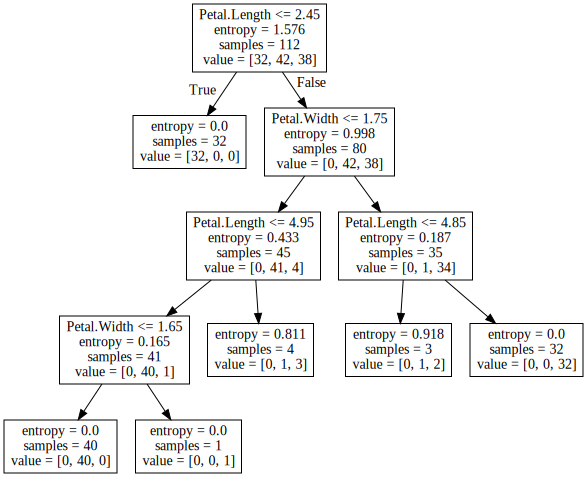

In [25]:
from graphviz import Source
file = open('iris_dtree.dot','r')
text = file.read()
Source(text)

### Visualization Tree: Second Way

In [26]:
import graphviz 
dot_data = export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

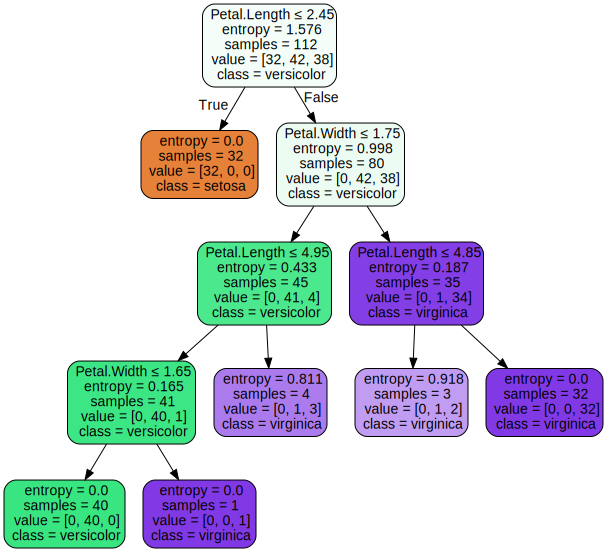

In [27]:
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names=features,  
                     class_names=data[target].unique().tolist(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 